In [276]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/swacker/miniconda3/envs/py3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning:

pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy



In [277]:
PATH = '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/'

In [278]:
from TB.c import *

In [279]:
glob(f'{PATH}/*')

['/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/MQ',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/QC.xml',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/QcDataTable.csv',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/rawtools_log.txt',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/rawtools_metrics.err',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/rawtools_metrics.out',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/rawtools_qc.err',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/rawtools_qc.out',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/SA001-R3-A-2ulf.raw',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/SA001-R3-A-2ulf.raw.mgf',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/SA001-R3-A-2ulf.raw_Matrix.txt',
 '/data/lrg_omics_test_data/proteomics/tmt11/raw/SA001-R3-A-2ulf/SA001-

In [280]:
from pyteomics import mgf

dfs = []
with mgf.read(f'{PATH}/SA001-R3-A-2ulf.raw.mgf') as reader:
    for spectrum in reader:
        print(spectrum)
        break

{'params': {'title': 'Spectrum_2594', 'pepmass': (448.209625244141, None), 'charge': [2], 'rtinseconds': 1081.851733361, 'scans': '2594', 'rawfile': '/var/www/html/omics/projects/LSARP/proteomics/raw/SA001-R3-A-2ulf/SA001-R3-A-2ulf.raw'}, 'm/z array': array([ 95.58199,  95.91405,  97.44611,  97.99182,  98.8794 ,  99.64925,
       105.54315, 108.45935, 119.77209, 124.4738 , 129.55962, 129.98172,
       138.77927, 145.62227, 147.04684, 147.46391, 147.47057, 147.47391,
       147.47734, 147.48073, 147.48415, 147.49162, 147.49811, 147.50151,
       147.50507, 147.52151, 147.83887, 218.42465, 225.54443, 237.46521,
       248.82671, 317.42044, 360.42429, 363.08539, 377.4696 , 661.4718 ]), 'intensity array': array([ 771.9612,  733.5237,  692.4395,  635.262 ,  744.3561,  726.663 ,
        733.1428,  850.5979,  950.2057, 1256.7701,  996.493 ,  893.7941,
       1082.9199, 1201.6119, 1045.2659, 1332.0986, 2641.7871, 1464.0909,
       2739.3281, 2699.3704, 2421.269 , 9236.0381, 3295.5332, 1924.314

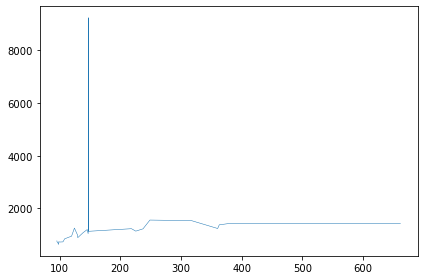

In [281]:
plot(spectrum['m/z array'], spectrum['intensity array'])

<BarContainer object of 36 artists>

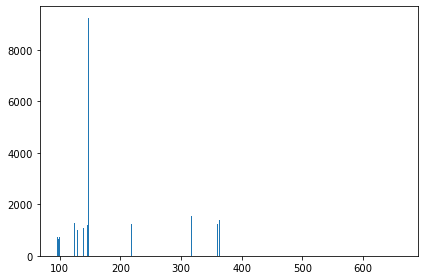

In [282]:
bar(spectrum['m/z array'], spectrum['intensity array'])

In [283]:
spectrum

{'params': {'title': 'Spectrum_2594',
  'pepmass': (448.209625244141, None),
  'charge': [2],
  'rtinseconds': 1081.851733361 second,
  'scans': '2594',
  'rawfile': '/var/www/html/omics/projects/LSARP/proteomics/raw/SA001-R3-A-2ulf/SA001-R3-A-2ulf.raw'},
 'm/z array': array([ 95.58199,  95.91405,  97.44611,  97.99182,  98.8794 ,  99.64925,
        105.54315, 108.45935, 119.77209, 124.4738 , 129.55962, 129.98172,
        138.77927, 145.62227, 147.04684, 147.46391, 147.47057, 147.47391,
        147.47734, 147.48073, 147.48415, 147.49162, 147.49811, 147.50151,
        147.50507, 147.52151, 147.83887, 218.42465, 225.54443, 237.46521,
        248.82671, 317.42044, 360.42429, 363.08539, 377.4696 , 661.4718 ]),
 'intensity array': array([ 771.9612,  733.5237,  692.4395,  635.262 ,  744.3561,  726.663 ,
         733.1428,  850.5979,  950.2057, 1256.7701,  996.493 ,  893.7941,
        1082.9199, 1201.6119, 1045.2659, 1332.0986, 2641.7871, 1464.0909,
        2739.3281, 2699.3704, 2421.269 , 923

In [284]:
def spectrum_to_df(spectrum):
    rt_entry_to_float_minutes = lambda x: float(x)/60
    df = pd.DataFrame()
    df['mz_array'] = spectrum['m/z array']
    df['intensity'] = spectrum['intensity array']
    df['spectrum'] = spectrum['params']['title']
    df['raw_file'] = spectrum['params']['rawfile']
    df['retention_time[min]'] = rt_entry_to_float_minutes(spectrum['params']['rtinseconds'])
    return df

spectra_to_df = np.vectorize(spectrum_to_df)

In [285]:
def mgf_to_df(fn):
    spectra = []
    with mgf.read(fn) as reader:
        for i,spectrum in enumerate(reader):
            spectra.append(spectrum)
    return pd.concat( spectra_to_df(spectra) )

In [286]:
fn = f'{PATH}/SA001-R3-A-2ulf.raw.mgf'

In [288]:
%%time
mgf_to_df(fn)

KeyboardInterrupt: 

In [289]:
mgf.read??

Signature: mgf.read(*args, **kwargs)
Source:   
def read(*args, **kwargs):
    """Returns a reader for a given MGF file. Most of the parameters repeat the
    instantiation signature of :py:class:`MGF` and :py:class:`IndexedMGF`.
    Additional parameter `use_index` helps decide which class to instantiate
    for given `source`.

    Parameters
    ----------

    source : str or file or None, optional
        A file object (or file name) with data in MGF format. Default is
        :py:const:`None`, which means read standard input.

    use_header : bool, optional
        Add the info from file header to each dict. Spectrum-specific parameters
        override those from the header in case of conflict.
        Default is :py:const:`True`.

    convert_arrays : one of {0, 1, 2}, optional
        If `0`, m/z, intensities and (possibly) charges will be returned as regular lists.
        If `1`, they will be converted to regular :py:class:`numpy.ndarray`'s.
        If `2`, charges will be 

In [290]:
reader = mgf.read(fn, convert_arrays=0, use_index=True)

In [297]:
spectrum_to_df( reader.get_by_index(22069) )

,mz_array,intensity,spectrum,raw_file,retention_time[min]
0,93.54303,751.3502,Spectrum_29827,/var/www/html/omics/projects/LSARP/proteomics/...,89.074867
1,94.38853,811.4921,Spectrum_29827,/var/www/html/omics/projects/LSARP/proteomics/...,89.074867
2,98.16981,664.8106,Spectrum_29827,/var/www/html/omics/projects/LSARP/proteomics/...,89.074867
3,99.57938,698.0575,Spectrum_29827,/var/www/html/omics/projects/LSARP/proteomics/...,89.074867
4,101.99403,863.0439,Spectrum_29827,/var/www/html/omics/projects/LSARP/proteomics/...,89.074867
5,102.36507,762.2603,Spectrum_29827,/var/www/html/omics/projects/LSARP/proteomics/...,89.074867
6,106.73825,890.3047,Spectrum_29827,/var/www/html/omics/projects/LSARP/proteomics/...,89.074867
7,109.43993,748.7405,Spectrum_29827,/var/www/html/omics/projects/LSARP/proteomics/...,89.074867
8,109.87733,1035.5068,Spectrum_29827,/var/www/html/omics/projects/LSARP/proteomics/...,89.074867
9,114.52850,848.2386,Spectrum_29827,/var/www/html/omics/projects/LSARP/proteomics/...,89.074867


In [275]:
reader.get_by_index(1)

ValueError: seek of closed file

In [126]:
def get_spectrum(ndx):
    df = spectrum_to_df( reader.get_by_index(ndx) )
    return df

In [127]:
df = get_spectrum(5588)

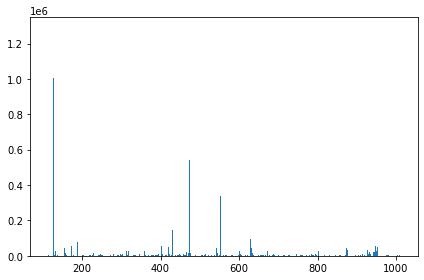

In [128]:
def plot_spectrum(ndx):
    df = get_spectrum(ndx)
    x = df.mz_array
    y = df.intensity
    fig = bar(x, y)
    show()

plot_spectrum(1000)

In [96]:
from ipywidgets import interact, IntSlider

In [115]:
spec_ndx = IntSlider(value=0, min=0, max=1000)

In [116]:
interact(plot_spectrum, ndx=spec_ndx)

interactive(children=(IntSlider(value=0, description='ndx', max=1000), Output()), _dom_classes=('widget-intera…

<function __main__.plot_spectrum(ndx)>

In [109]:
df = get_spectrum(100)
df

([117.54013,
  126.12473,
  126.12749,
  127.12453,
  127.13084,
  127.88962,
  128.12518,
  128.12791,
  128.13417,
  129.12794,
  129.13126,
  129.1375,
  129.25993,
  130.13461,
  130.14084,
  131.13799,
  131.14427,
  132.72511,
  133.62386,
  134.04022,
  136.26205,
  143.79811,
  148.82912,
  149.44156,
  152.74602,
  158.0921,
  171.07594,
  175.11858,
  186.15276,
  201.05035,
  205.86346,
  214.5081,
  230.16957,
  248.00504,
  255.90187,
  259.19629,
  287.13528,
  287.19153,
  298.79175,
  300.11844,
  330.3129,
  346.2283,
  348.72537,
  374.22327,
  402.52646,
  414.19724,
  416.68723,
  427.35327,
  439.19278,
  440.17834,
  447.07733,
  457.2034,
  458.20673,
  469.4996,
  474.23016,
  486.58817,
  575.31128,
  602.28906,
  603.33075,
  631.32568,
  645.31696,
  651.31726,
  660.32251,
  660.82379,
  689.31989,
  690.36334,
  757.36505,
  775.37775,
  818.41992,
  828.40472,
  846.41461,
  850.03015,
  946.4209,
  1033.45166,
  1090.47437,
  1091.47986,
  1112.52795,
  1

In [118]:
import plotly.express as px

In [132]:
df

,mz_array,intensity,spectrum,raw_file,retention_time[min]
0,110.07146,25439.2285,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
1,110.07394,1646.7223,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
2,114.06616,982.9742,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
3,116.05611,886.4932,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
4,117.19048,916.0654,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
...,...,...,...,...,...
255,972.64026,41140.2617,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
256,973.63867,83469.3359,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
257,974.64166,6498.1094,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
258,986.55060,2102.2896,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581


In [135]:
df

,mz_array,intensity,spectrum,raw_file,retention_time[min]
0,110.07146,25439.2285,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
1,110.07394,1646.7223,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
2,114.06616,982.9742,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
3,116.05611,886.4932,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
4,117.19048,916.0654,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
...,...,...,...,...,...
255,972.64026,41140.2617,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
256,973.63867,83469.3359,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
257,974.64166,6498.1094,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
258,986.55060,2102.2896,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581


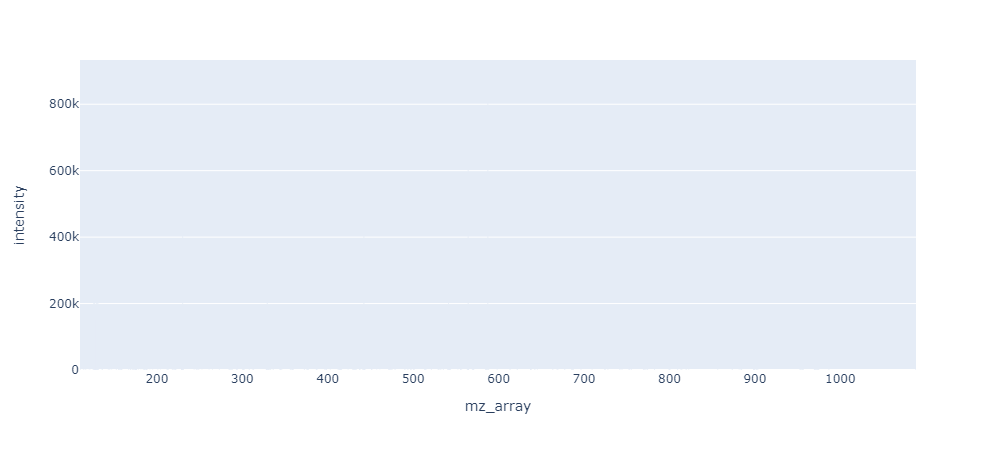

In [134]:
fig = px.bar(df, x='mz_array', y='intensity')
fig.show()

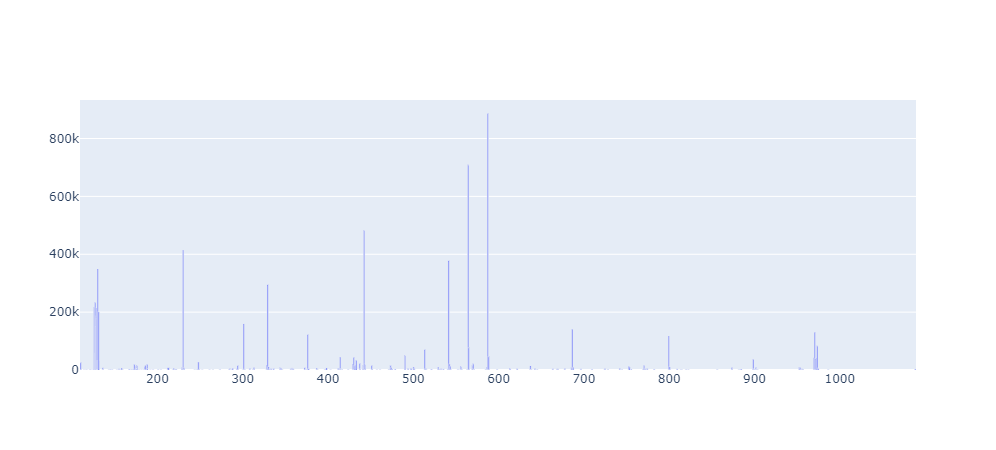

In [160]:
import plotly.graph_objects as go 

fig = go.Figure(data=[go.Bar(
    x=df['mz_array'],
    y=df['intensity'],
    width = 1.5
)])

fig.show()

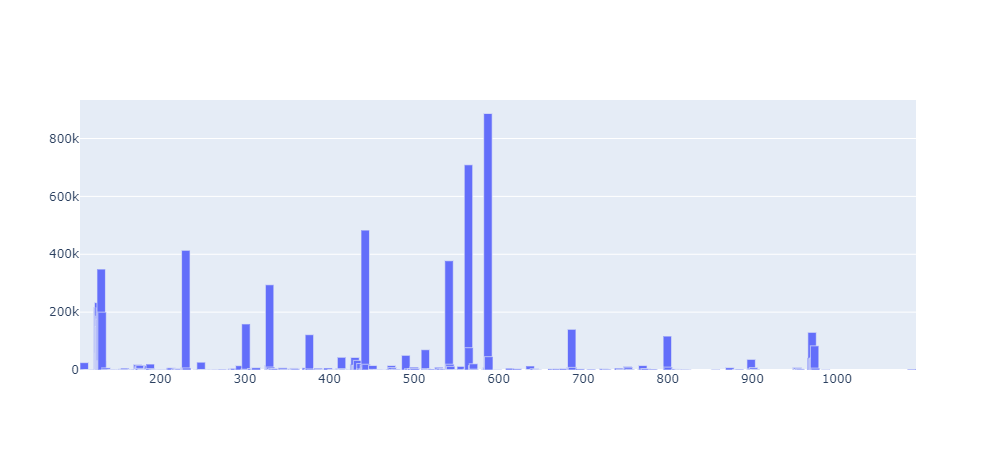

In [163]:
fig.data[0]['width'] = 10
fig.

In [225]:
from lrg_omics.plotly import set_template
set_template()

In [229]:
df

,index,mz_array,intensity,spectrum,raw_file,retention_time[min]
0,0,110.07146,25439.2285,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
1,1,110.07394,1646.7223,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
2,2,114.06616,982.9742,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
3,3,116.05611,886.4932,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
4,4,117.19048,916.0654,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
...,...,...,...,...,...,...
255,255,972.64026,41140.2617,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
256,256,973.63867,83469.3359,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
257,257,974.64166,6498.1094,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
258,258,986.55060,2102.2896,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581


In [263]:
def plot_spectrum(df, plot=True, annot_threshold=1e4, threshold=0):

    df = df[df.intensity > threshold].reset_index()

    df1 = df.copy()
    df1['Text'] = df1.mz_array.astype(str)
    df1.loc[df1.intensity < annot_threshold, 'Text'] = None
    df1.Text.notnull().sum()

    df2 = df.copy()
    df2['intensity'] = 0
    
    df3 = pd.concat([df1, df2]).sort_values(['index', 'intensity'])
    
    fig = px.line(df3, x='mz_array', y='intensity', color='index', text='Text',
                  hover_data={'Text': False,
                              'index': False})
    fig.update_layout(showlegend=False)
    fig.update_traces(line=dict(width=1, color='grey'))
    fig.update_traces(textposition='top center')
    fig.update_layout(hovermode="x unified")
    return fig


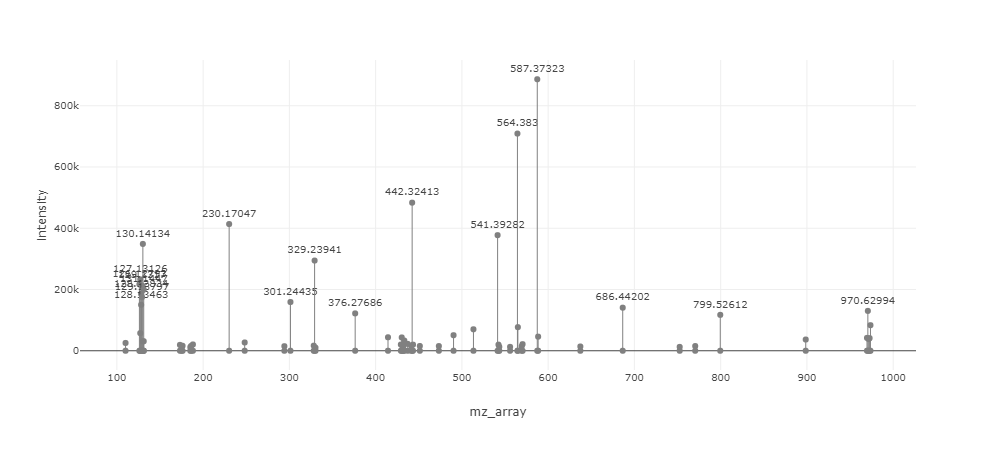

In [264]:
df = get_spectrum(5588)
plot_spectrum(df, annot_threshold=1e5, threshold=1e4)

In [239]:
df

,mz_array,intensity,spectrum,raw_file,retention_time[min]
0,110.07146,25439.2285,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
1,110.07394,1646.7223,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
2,114.06616,982.9742,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
3,116.05611,886.4932,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
4,117.19048,916.0654,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
...,...,...,...,...,...
255,972.64026,41140.2617,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
256,973.63867,83469.3359,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
257,974.64166,6498.1094,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
258,986.55060,2102.2896,Spectrum_8790,/var/www/html/omics/projects/LSARP/proteomics/...,31.390581
